In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Display the first few rows
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


      RM  LSTAT  PTRATIO   Price
0  6.575   4.98     15.3  504000
1  6.421   9.14     17.8  453600
2  7.185   4.03     17.8  728700
3  6.998   2.94     18.7  701400
4  7.147   5.33     18.7  760200
               RM       LSTAT     PTRATIO         Price
count  489.000000  489.000000  489.000000  4.890000e+02
mean     6.240288   12.939632   18.516564  4.543429e+05
std      0.643650    7.081990    2.111268  1.653403e+05
min      3.561000    1.980000   12.600000  1.050000e+05
25%      5.880000    7.370000   17.400000  3.507000e+05
50%      6.185000   11.690000   19.100000  4.389000e+05
75%      6.575000   17.120000   20.200000  5.187000e+05
max      8.398000   37.970000   22.000000  1.024800e+06
RM         0
LSTAT      0
PTRATIO    0
Price      0
dtype: int64


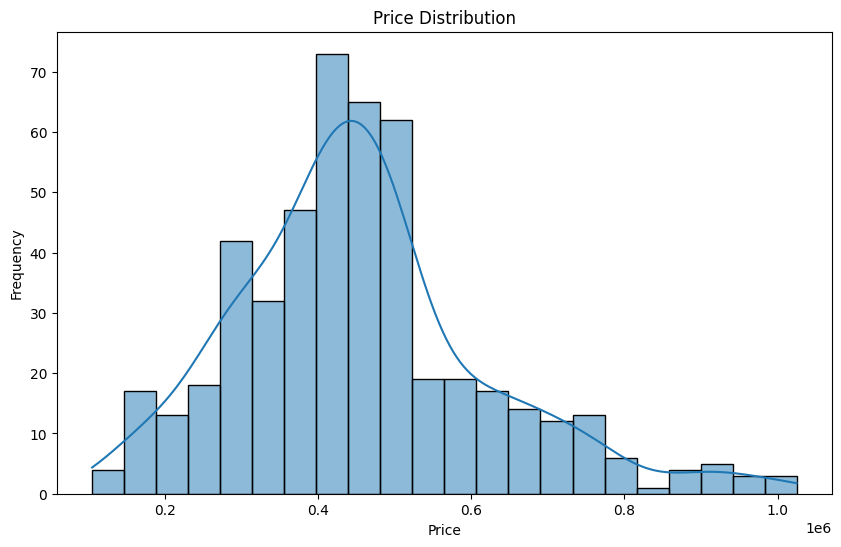

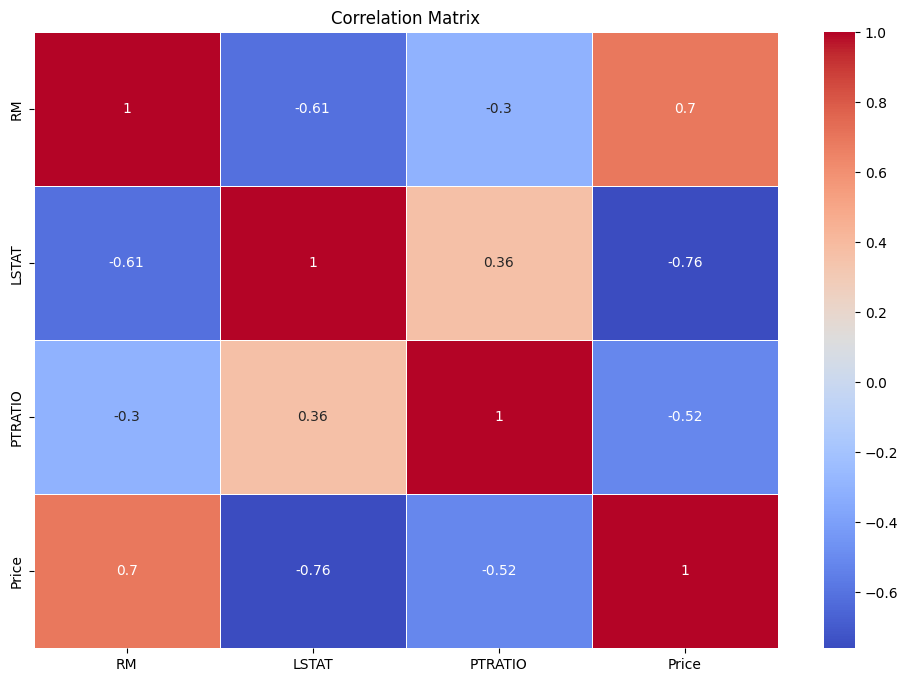

In [7]:
# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Mean Squared Error: 18105992728.200077
R-squared: 0.17616149786779778


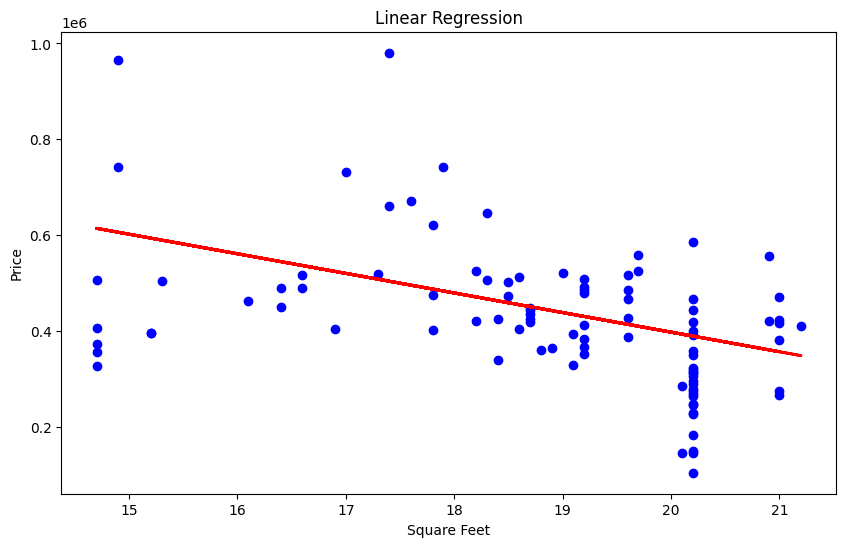

In [10]:
# Define feature (X) and target (y)
X = df[['PTRATIO']]  # Replace with the correct feature column
y = df['Price']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()


C:\Users\anshm\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


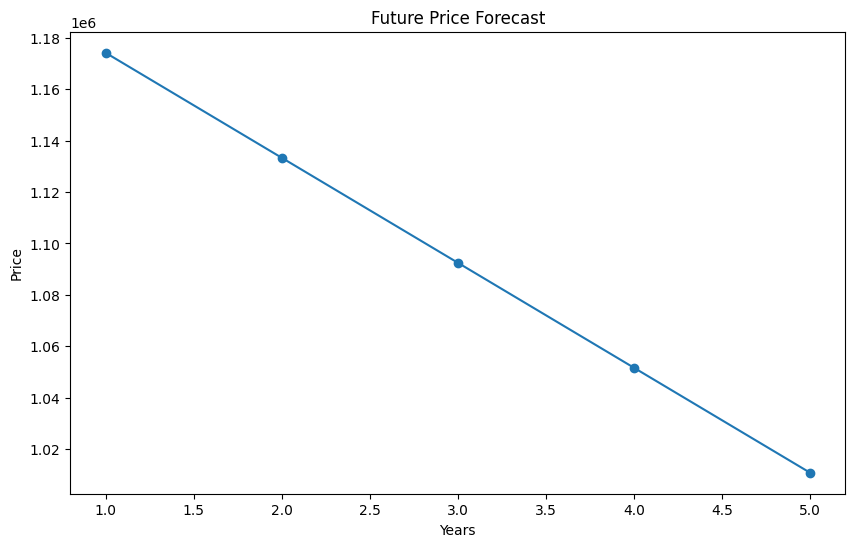

In [11]:
# Assuming the market grows linearly, forecasting future prices
years = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Example years
future_prices = model.predict(years)

plt.figure(figsize=(10, 6))
plt.plot(years, future_prices, marker='o')
plt.title('Future Price Forecast')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()


In [12]:
# Assuming linear growth: y = mx + c
m = model.coef_[0]  # Slope
c = model.intercept_  # Intercept
print(f'Financial Model Equation: y = {m:.2f}x + {c:.2f}')


Financial Model Equation: y = -40846.66x + 1215029.30
